# Evaluate HammerDB Result

About the benchmark [1]:
> The TPC-C specification on which TPROC-C is based implements a computer system to fulfil orders from customers to supply products from a company. The company sells 100,000 items and keeps its stock in warehouses. Each warehouse has 10 sales districts and each district serves 3000 customers. The customers call the company whose operators take the order, each order containing a number of items. Orders are usually satisfied from the local warehouse however a small number of items are not in stock at a particular point in time and are supplied by an alternative warehouse. It is important to note that the size of the company is not fixed and can add Warehouses and sales districts as the company grows. For this reason your test schema can be as small or large as you wish with a larger schema requiring a more powerful computer system to process the increased level of transactions. The TPROC-C schema is shown below, in particular note how the number of rows in all of the tables apart from the ITEM table which is fixed is dependent upon the number of warehouses you choose to create your schema.

<img src="https://www.hammerdb.com/docs/resources/ch3-2.png" alt="drawing" width="600"/>

About the metrics [2]:
> HammerDB workloads produce 2 statistics to compare systems called **TPM** and NOPM respectively. NOPM value is based on a metric captured from within the test schema itself. As such **NOPM (New Orders per minute)** as a performance metric independent of any particular database implementation is the recommended primary metric to use.

References
1. https://www.hammerdb.com/docs/ch03s05.html
1. https://www.hammerdb.com/docs/ch03s04.html
1. https://www.hammerdb.com/docs/ch03.html

## Import Packages

In [10]:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
#import os
#import re
import matplotlib.pyplot as plt
#import pickle
from IPython.display import display, Markdown
import seaborn as sns
import ast
import re

#import dbmsbenchmarker
#import bexhoma
from bexhoma import evaluators

%matplotlib inline

In [11]:
def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

def generate_df(code):
    evaluation = evaluators.tpcc(code=str(code), path=path)
    df_benchmarks = evaluation.get_df_benchmarking()
    #df = df[df.columns.drop(list(df.filter(regex='FAILED')))]
    df_benchmarks = evaluation.benchmarking_set_datatypes(df_benchmarks)
    #df_benchmarks.T
    #print(df_benchmarks)
    with open(path+"/"+str(code)+"/connections.config",'r') as inf:
        connections = ast.literal_eval(inf.read())
    #print("found", len(connections), "connections")
    connections_sorted = sorted(connections, key=lambda c: c['name'])
    connections_sorted
    for c in connections_sorted:
        #print(c)
        connection_name = c['name']
        #orig_name = c['orig_name']
        #print(c)
        df_benchmarks['CPU'] = c['hostsystem']['CPU']
        df_benchmarks['Cores'] = c['hostsystem']['Cores']
        df_benchmarks['node'] = c['hostsystem']['node']    
    #df_benchmarks
    return df_benchmarks

def merge_experiments(df_time, code):
    df_time_tmp = generate_df(code)
    df_time = pd.concat([df_time, df_time_tmp])
    return df_time


In [27]:
codes = [
    1746021156, # 10
    1746024755, # 11
    1746028355, # 12
    1746031956, # 13
    1746035556, # 14
    1746039156, # 15
    1746042755, # 17
    1746046356, # 19
    1746053556, # 21
    1746057156, # 22
    1746060756, # 23
    1746064356, # 24
    1746067956, # 25
    1746071556, # 27
    1746075156, # 28
    1746078756, # 29
    1746049956, # 2
    1746085956, # 34
    1746089556, # 36
    1746082356, # 3
    1746093156, # 4
    1746096756, # 5
]

path = "/home/perdelt/benchmarks"

df_time = pd.DataFrame()

for code in codes:
    df_time = merge_experiments(df_time, code)

df_time.T

connection_pod,PostgreSQL-BHT-16-1-2-1,PostgreSQL-BHT-16-1-1-1,PostgreSQL-BHT-16-1-1-1,PostgreSQL-BHT-16-1-2-1,PostgreSQL-BHT-16-1-2-1,PostgreSQL-BHT-16-1-1-1,PostgreSQL-BHT-16-1-1-1,PostgreSQL-BHT-16-1-2-1,PostgreSQL-BHT-16-1-1-1,PostgreSQL-BHT-16-1-2-1,...,PostgreSQL-BHT-16-1-2-1,PostgreSQL-BHT-16-1-1-1,PostgreSQL-BHT-16-1-1-1,PostgreSQL-BHT-16-1-2-1,PostgreSQL-BHT-16-1-2-1,PostgreSQL-BHT-16-1-1-1,PostgreSQL-BHT-16-1-2-1,PostgreSQL-BHT-16-1-1-1,PostgreSQL-BHT-16-1-2-1,PostgreSQL-BHT-16-1-1-1
connection,PostgreSQL-BHT-16-1-2,PostgreSQL-BHT-16-1-1,PostgreSQL-BHT-16-1-1,PostgreSQL-BHT-16-1-2,PostgreSQL-BHT-16-1-2,PostgreSQL-BHT-16-1-1,PostgreSQL-BHT-16-1-1,PostgreSQL-BHT-16-1-2,PostgreSQL-BHT-16-1-1,PostgreSQL-BHT-16-1-2,...,PostgreSQL-BHT-16-1-2,PostgreSQL-BHT-16-1-1,PostgreSQL-BHT-16-1-1,PostgreSQL-BHT-16-1-2,PostgreSQL-BHT-16-1-2,PostgreSQL-BHT-16-1-1,PostgreSQL-BHT-16-1-2,PostgreSQL-BHT-16-1-1,PostgreSQL-BHT-16-1-2,PostgreSQL-BHT-16-1-1
configuration,PostgreSQL-BHT-16-1,PostgreSQL-BHT-16-1,PostgreSQL-BHT-16-1,PostgreSQL-BHT-16-1,PostgreSQL-BHT-16-1,PostgreSQL-BHT-16-1,PostgreSQL-BHT-16-1,PostgreSQL-BHT-16-1,PostgreSQL-BHT-16-1,PostgreSQL-BHT-16-1,...,PostgreSQL-BHT-16-1,PostgreSQL-BHT-16-1,PostgreSQL-BHT-16-1,PostgreSQL-BHT-16-1,PostgreSQL-BHT-16-1,PostgreSQL-BHT-16-1,PostgreSQL-BHT-16-1,PostgreSQL-BHT-16-1,PostgreSQL-BHT-16-1,PostgreSQL-BHT-16-1
experiment_run,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
client,2,1,1,2,2,1,1,2,1,2,...,2,1,1,2,2,1,2,1,2,1
pod,ggzz4.dbmsbenchmarker,jr66w.dbmsbenchmarker,sxvpr.dbmsbenchmarker,4tl5d.dbmsbenchmarker,x4ctb.dbmsbenchmarker,9whtz.dbmsbenchmarker,4x95b.dbmsbenchmarker,psdx2.dbmsbenchmarker,m5j7d.dbmsbenchmarker,x6wlt.dbmsbenchmarker,...,2ctkb.dbmsbenchmarker,dm476.dbmsbenchmarker,jlkh7.dbmsbenchmarker,9zqnv.dbmsbenchmarker,l4drd.dbmsbenchmarker,dctmg.dbmsbenchmarker,lmj6p.dbmsbenchmarker,8jwbx.dbmsbenchmarker,nwt89.dbmsbenchmarker,4885l.dbmsbenchmarker
pod_count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
iterations,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,...,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000
duration,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
rampup,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
sf,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16


In [28]:
#df_time['time'] = df_time['[OVERALL].RunTime(ms)']/1000.
column = 'NOPM'
result = 'NOPM'
title = 'New Orders per Minute'
df_time['time'] = df_time[column]


In [29]:
df_benchmarks = df_time.set_index(['node', 'client'])
df_benchmarks

connection        configuration  \
node        client                                               
cl-worker10 2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
            1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
cl-worker11 1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
            2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
cl-worker12 2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
            1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
cl-worker13 1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
            2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
cl-worker14 1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
            2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
cl-worker15 1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
            2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
cl-worker17 2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
            1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
cl-worker19 1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
            2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
cl-worker21 2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
            1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
cl-worker22 2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
            1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
cl-worker23 1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
            2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
cl-worker24 1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
            2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
cl-worker25 2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
            1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
cl-worker27 2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
            1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
cl-worker28 1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
            2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
cl-worker29 2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
            1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
cl-worker2  2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
            1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
cl-worker34 2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
            1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
cl-worker36 1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
            2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
cl-worker3  2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
            1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
cl-worker4  2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
            1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   
cl-worker5  2       PostgreSQL-BHT-16-1-2  PostgreSQL-BHT-16-1   
            1       PostgreSQL-BHT-16-1-1  PostgreSQL-BHT-16-1   

                    experiment_run                    pod  pod_count  \
node        client                                                     
cl-worker10 2                    1  ggzz4.dbmsbenchmarker          1   
            1                    1  jr66w.dbmsbenchmarker          1   
cl-worker11 1                    1  sxvpr.dbmsbenchmarker          1   
            2                    1  4tl5d.dbmsbenchmarker          1   
cl-worker12 2                    1  x4ctb.dbmsbenchmarker          1   
            1                    1  9whtz.dbmsbenchmarker          1   
cl-worker13 1                    1  4x95b.dbmsbenchmarker          1   
            2                    1  psdx2.dbmsbenchmarker          1   
cl-worker14 1                    1  m5j7d.dbmsbenchmarker          1   
            2                    1  x6wlt.dbmsbenchmarker          1   
cl-worker15 1                    1  dd7rj.dbmsbenchmarker          1   
            2                    1  bps6m.dbmsbenchmarker 

In [30]:
import matplotlib.pyplot as plt

# Unstack so that num_client is on the x-axis and each node is a separate bar
df_unstacked = df_benchmarks['time'].unstack(level=1)
sorted_index = natural_sort(df_unstacked.index)
df_unstacked = df_unstacked.loc[sorted_index]
df_unstacked

client,1,2
node,,
cl-worker2,1953,1888
cl-worker3,2047,1964
cl-worker4,1999,1972
cl-worker5,2023,1923
cl-worker10,1998,1945
cl-worker11,2203,2292
cl-worker12,2439,2371
cl-worker13,2304,2259
cl-worker14,2289,2115


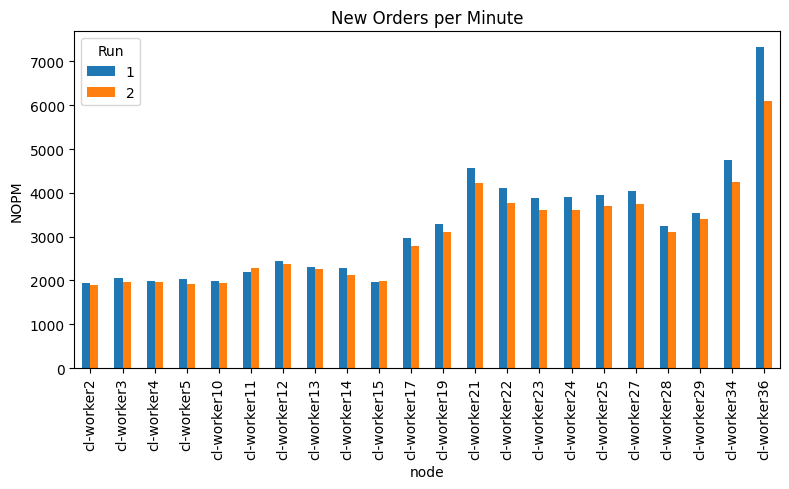

client,1,2
node,,
cl-worker2,1953,1888
cl-worker3,2047,1964
cl-worker4,1999,1972
cl-worker5,2023,1923
cl-worker10,1998,1945
cl-worker11,2203,2292
cl-worker12,2439,2371
cl-worker13,2304,2259
cl-worker14,2289,2115


In [31]:
# Plot the grouped bar chart
df_unstacked.plot(kind='bar', figsize=(8, 5))

plt.ylabel(result)
plt.title(title)
plt.legend(title='Run')
#plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("hammerdb_time_per_node.png", dpi=300)
plt.show()
df_unstacked

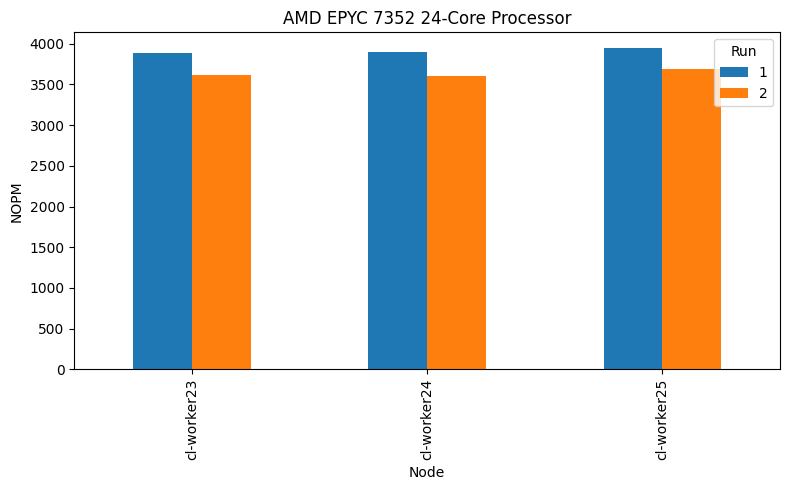

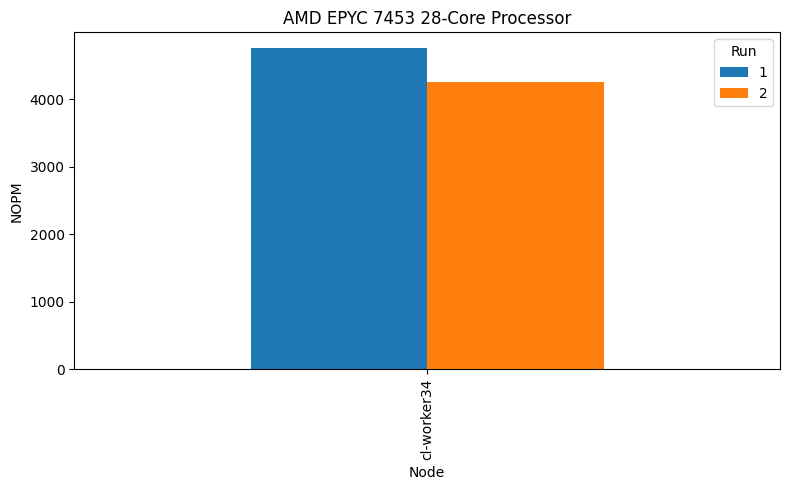

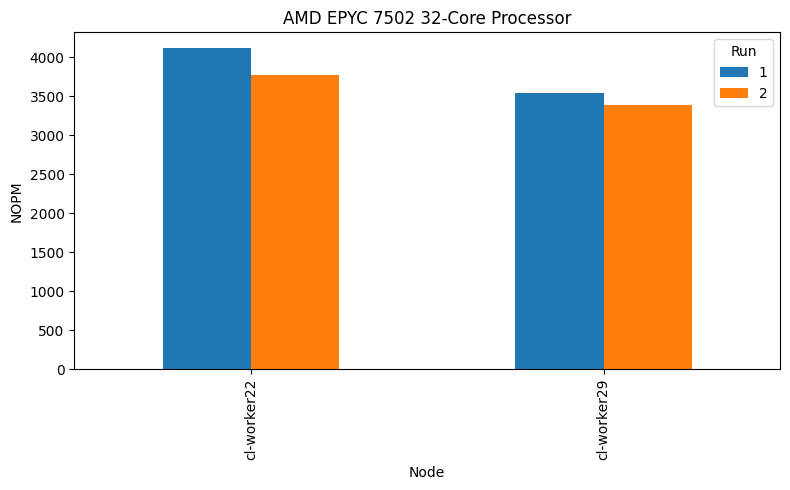

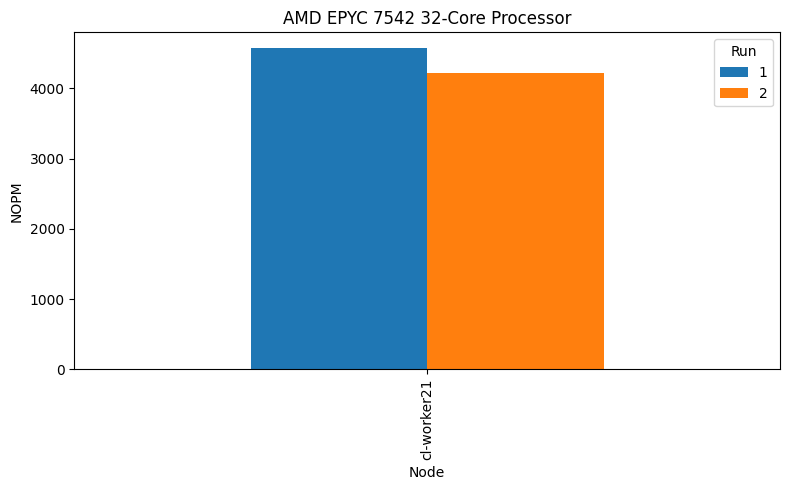

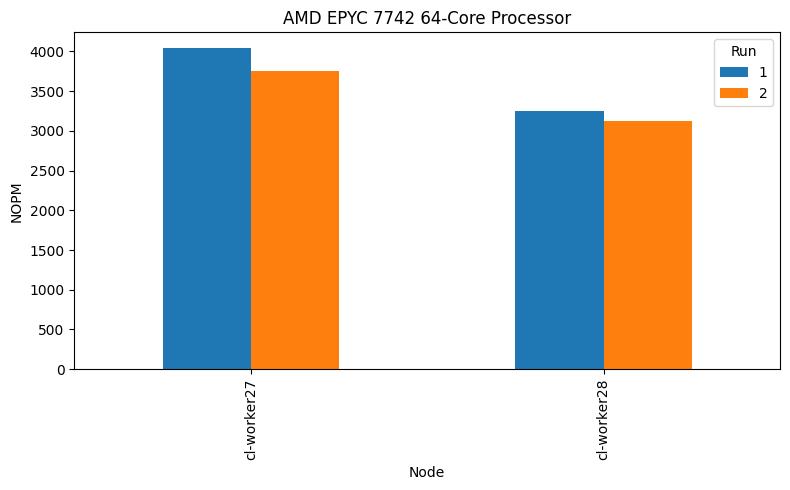

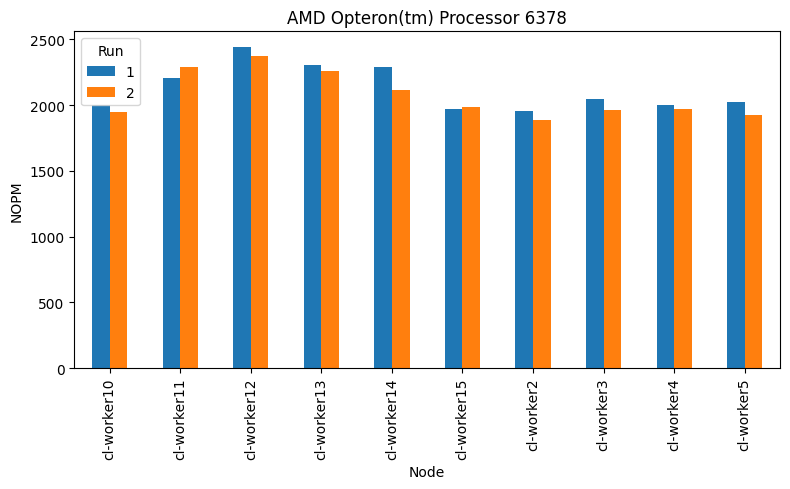

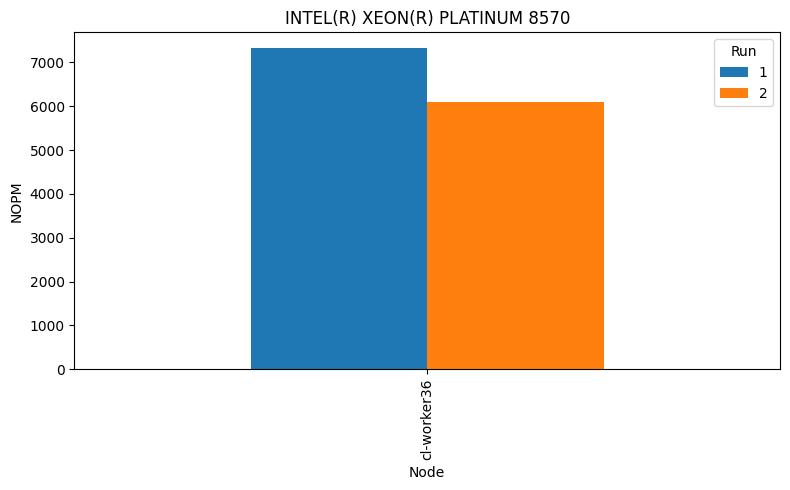

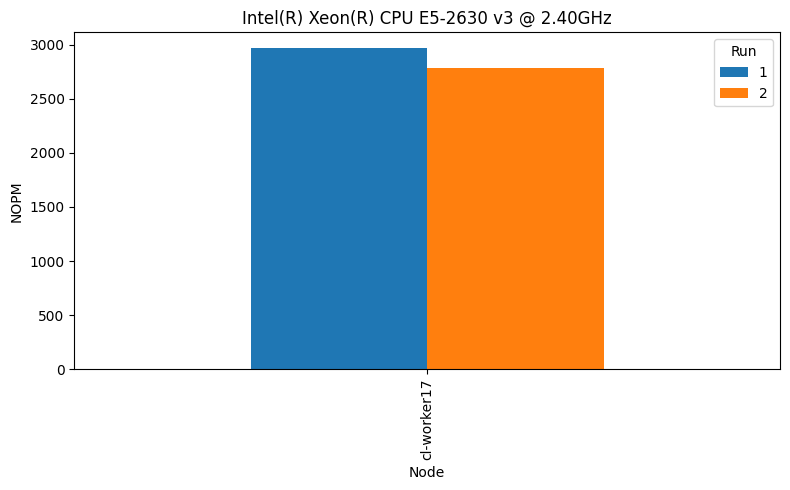

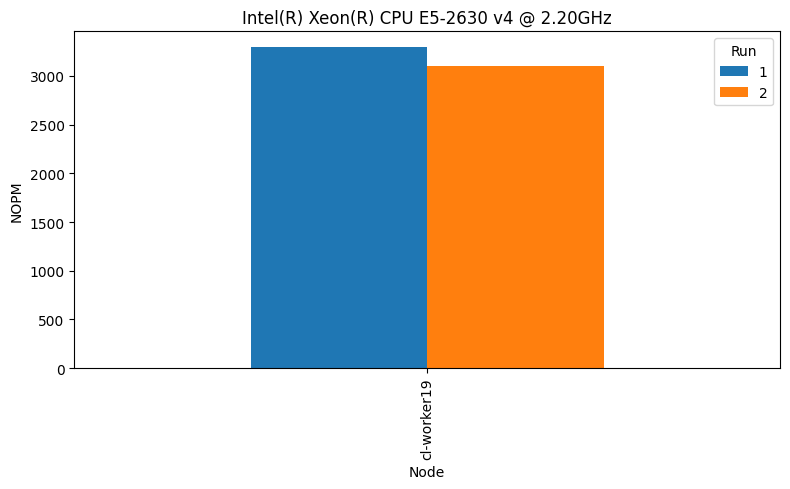

In [32]:
df = df_time.copy()
df = df.set_index(['CPU', 'node', 'client'])
# Group by CPU
for cpu, cpu_df in df.groupby(level='CPU'):
    # Unstack to get nodes as columns, num_client as x-axis
    cpu_df = cpu_df.droplevel('CPU')
    df_unstacked = cpu_df['time'].unstack(level='client')

    # Plot
    ax = df_unstacked.plot(kind='bar', figsize=(8, 5), title=cpu)
    ax.set_ylabel(result)
    ax.set_xlabel("Node")
    ax.legend(title='Run')
    ax.set_xticks(range(len(df_unstacked.index)))
    ax.set_xticklabels(df_unstacked.index, rotation=90)
    plt.tight_layout()
    plt.show()


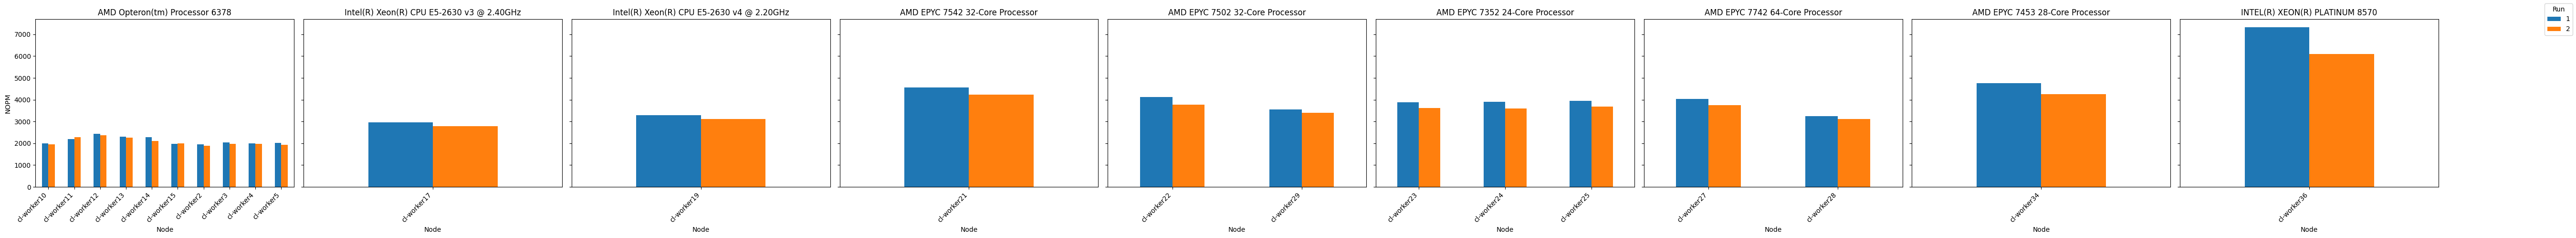

In [34]:
import matplotlib.pyplot as plt

# Get unique CPUs
cpus = df.index.get_level_values('CPU').unique()
n_cpus = len(cpus)

# Create subplots — one row of plots
fig, axes = plt.subplots(nrows=1, ncols=n_cpus, figsize=(6 * n_cpus, 5), sharey=True)

# If only one CPU, axes is not a list — make it iterable
if n_cpus == 1:
    axes = [axes]

# Loop through CPUs and plot into each subplot
for ax, cpu in zip(axes, cpus):
    cpu_df = df.xs(cpu, level='CPU')  # slice data for this CPU
    df_unstacked = cpu_df['time'].unstack(level='client')

    df_unstacked.plot(kind='bar', ax=ax, legend=False)

    ax.set_title(cpu)
    ax.set_xlabel("Node")
    ax.set_ylabel(result)
    ax.set_xticks(range(len(df_unstacked.index)))
    ax.set_xticklabels(df_unstacked.index, rotation=45, ha='right')

# Add one legend for the whole figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Run', loc='upper right')

plt.tight_layout(rect=[0, 0, 0.95, 1])  # leave space for legend

# Save to file
plt.savefig("hammerdb_time_per_cpu.png", dpi=300)
plt.show()
plt.close()
